#### Written By   : Rupesh Kumar Dey
#### Last Modified: 16-July-2021

#1.0 Importing Libraries & Raw Data & Mounting Google Drive

In [370]:
#Importing the general 
import numpy as np    #For matrix manipulation and creation
import pandas as pd   #For importing and manipulating data
import seaborn as sns #For graphical plotting
import matplotlib.pyplot as plt  #For graphical plotting

#Subsequent library import will be executed in relevant cells. 

In [371]:
#Mounting google drive
from google.colab import drive
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [372]:
#Reading in the raw data from the project directory
df_raw = pd.read_csv("/drive/MyDrive/Colab Notebooks/Own Project/Fusionex Task/data.csv")
df_raw.head()

,customerID,customerZip,daysSinceLastPurchase,daysPurchaseVisits,totalNetSales,usesCreditCard,avgSpentPerVisit,customerFaveBrandID,percentageSpentSweater,percentageSpentKnitTop,percentageSpentKnitDress,percentageSpentBlouse,percentageSpentJacket,percentageSpentPantsFormal,percentageSpentPantsCasual,percentageSpentShirt,percentageSpentDress,percentageSpentSuit,percentageSpentOuterwear,percentageSpentJewellery,percentageSpentFashion,percentageSpentLegwear,percentageSpentCollectibles,amountSpentFranchiseA,amountSpentFranchiseB,amountSpentFranchiseC,amountSpentFranchiseD,amountSpentLast3Months,amountSpentLast1Months,amountSpentLast6Months,amountSpentLast1Years,grossMarginPercentage,promoCount,customerDaysOnFile,daysBetweenPurchases,purchaseMarkdownPercentage,numUniqueProductTypePurchased,numCouponsUsed,numProductsPurchased,numStoresVisited,storeLocID,customerContactGiven,isWebShopper,numPromosMailedLast1Years,numPromosRespondedLast1Years,responseRateLast1Years,productUniformity,lifetimeAvgBetweenVisits,mClusterType,percentageReturns,customerIsResponse
0,C000001,1001,208,2,368.46,0,184.23,11,0.18,0.00,0.00,0.30,0.0,0.25,0.00,0.19,0.00,0.0,0.0,0.000000,0.02,0.03,0.29,0.0,0.0,368.46,0.0,0.00,0.00,0.00,0.00,0.60,17,666,333.00,0.08,9,1,11,1,7,N,0,5,0,0.00,31.81,111.00,10,0.00,0
1,C000002,1028,6,4,258.00,1,64.50,11,0.26,0.16,0.00,0.00,0.0,0.18,0.14,0.00,0.18,0.0,0.0,0.000000,0.00,0.02,0.37,0.0,0.0,258.00,0.0,138.00,55.99,258.00,0.00,0.54,14,696,174.00,0.33,6,0,14,1,7,Y,0,4,2,50.00,32.72,43.50,10,0.03,1
2,C000003,1056,327,2,77.00,0,38.50,11,1.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000000,0.00,0.00,0.00,0.0,0.0,77.00,0.0,0.00,0.00,0.00,39.00,0.62,10,343,171.50,0.11,1,0,2,1,7,N,0,4,0,0.00,100.00,68.60,16,0.00,0
3,C000004,1118,66,8,846.06,1,105.75,11,0.38,0.00,0.05,0.06,0.2,0.17,0.00,0.05,0.00,0.0,0.0,0.005307,0.03,0.01,0.00,0.0,0.0,846.06,0.0,104.94,0.00,373.87,166.25,0.43,24,701,87.62,0.29,15,3,35,1,7,Y,0,9,6,66.67,23.27,26.96,10,0.00,0
4,C000005,1107,49,1,87.44,0,87.44,11,0.20,0.20,0.00,0.00,0.0,0.00,0.41,0.00,0.00,0.0,0.0,0.170000,0.00,0.00,0.00,0.0,0.0,87.44,0.0,87.44,0.00,87.44,0.00,0.22,0,49,49.00,0.42,4,0,8,1,7,Y,0,0,0,0.00,28.52,24.50,20,0.00,0


In [373]:
#Checking the shape of the data
df_raw.shape

(21740, 51)

#2.0 Data Analysis / Feature Engineering

# 2.1 Checking Structure of Data and Missing Values
- Check for missing values
- Inspect columns and nature of the features
- Dropped customer ID feature columm


In [374]:
#To check if there are missing values
df_raw.isnull().sum()

customerID                       0
customerZip                      0
daysSinceLastPurchase            0
daysPurchaseVisits               0
totalNetSales                    0
usesCreditCard                   0
avgSpentPerVisit                 0
customerFaveBrandID              0
percentageSpentSweater           0
percentageSpentKnitTop           0
percentageSpentKnitDress         0
percentageSpentBlouse            0
percentageSpentJacket            0
percentageSpentPantsFormal       0
percentageSpentPantsCasual       0
percentageSpentShirt             0
percentageSpentDress             0
percentageSpentSuit              0
percentageSpentOuterwear         0
percentageSpentJewellery         0
percentageSpentFashion           0
percentageSpentLegwear           0
percentageSpentCollectibles      0
amountSpentFranchiseA            0
amountSpentFranchiseB            0
amountSpentFranchiseC            0
amountSpentFranchiseD            0
amountSpentLast3Months           0
amountSpentLast1Mont

In [375]:
# Inspecting all of the feature column data types
# There are categorical and numerical data. The categorical data however are majority represented by integers and not object. 
df_raw.dtypes

customerID                        object
customerZip                        int64
daysSinceLastPurchase              int64
daysPurchaseVisits                 int64
totalNetSales                    float64
usesCreditCard                     int64
avgSpentPerVisit                 float64
customerFaveBrandID                int64
percentageSpentSweater           float64
percentageSpentKnitTop           float64
percentageSpentKnitDress         float64
percentageSpentBlouse            float64
percentageSpentJacket            float64
percentageSpentPantsFormal       float64
percentageSpentPantsCasual       float64
percentageSpentShirt             float64
percentageSpentDress             float64
percentageSpentSuit              float64
percentageSpentOuterwear         float64
percentageSpentJewellery         float64
percentageSpentFashion           float64
percentageSpentLegwear           float64
percentageSpentCollectibles      float64
amountSpentFranchiseA            float64
amountSpentFranc

In [376]:
# Checking for unique number of values for int data types to classify them as numerical / categorical data
# usesCreditCard
# customerFaveBrandID
# storeLocID
# customerContactGiven
# isWebShopper
# mClusterType
# customerIsResponse - OUTPUT
df_raw.select_dtypes(include = ["int","object"]).nunique()

customerID                       21740
customerZip                       7419
daysSinceLastPurchase              362
daysPurchaseVisits                  76
usesCreditCard                       2
customerFaveBrandID                  6
promoCount                          38
customerDaysOnFile                 693
numUniqueProductTypePurchased       36
numCouponsUsed                      25
numProductsPurchased               220
numStoresVisited                    18
storeLocID                        1076
customerContactGiven                 2
isWebShopper                         2
numPromosMailedLast1Years           12
numPromosRespondedLast1Years        12
mClusterType                        51
customerIsResponse                   2
dtype: int64

In [377]:
#Creating a copy of the raw dataset for manipulation / analysis
df1 = df_raw.copy()

#Dropping customer ID. Irrelevant feature
df1.drop(["customerID"],inplace = True,axis = 1)

# 2.2 Segregating data into Numerical and Categorical sets
- Split the numerical and categorical data types for further analysis.

In [378]:
# Creating a separate dataset for categorical data
df_categorical = df1[["usesCreditCard","customerFaveBrandID","storeLocID","customerContactGiven","isWebShopper","mClusterType","customerIsResponse"]]

# Creating a separate dataset for numerical data
df_numerical = df1.drop(["usesCreditCard","customerFaveBrandID","storeLocID","customerContactGiven","isWebShopper","mClusterType"],axis = 1) 
# Defining the names of the numerical data columns
numerical_columns = df_numerical.columns 

# 2.3 Analysing Numerical Data
- Exploring / Analyse the numerical feature data columns 
- Selecting relevant features. 

# 2.3.1
- Plot a boxplot to visualize the separability / spread of the numerical data for each class. 
- Based on Visual analysis, the data is split into 2 numerical groups for further analysis and feature selection (df_numerical_1 & df_numerical_2)

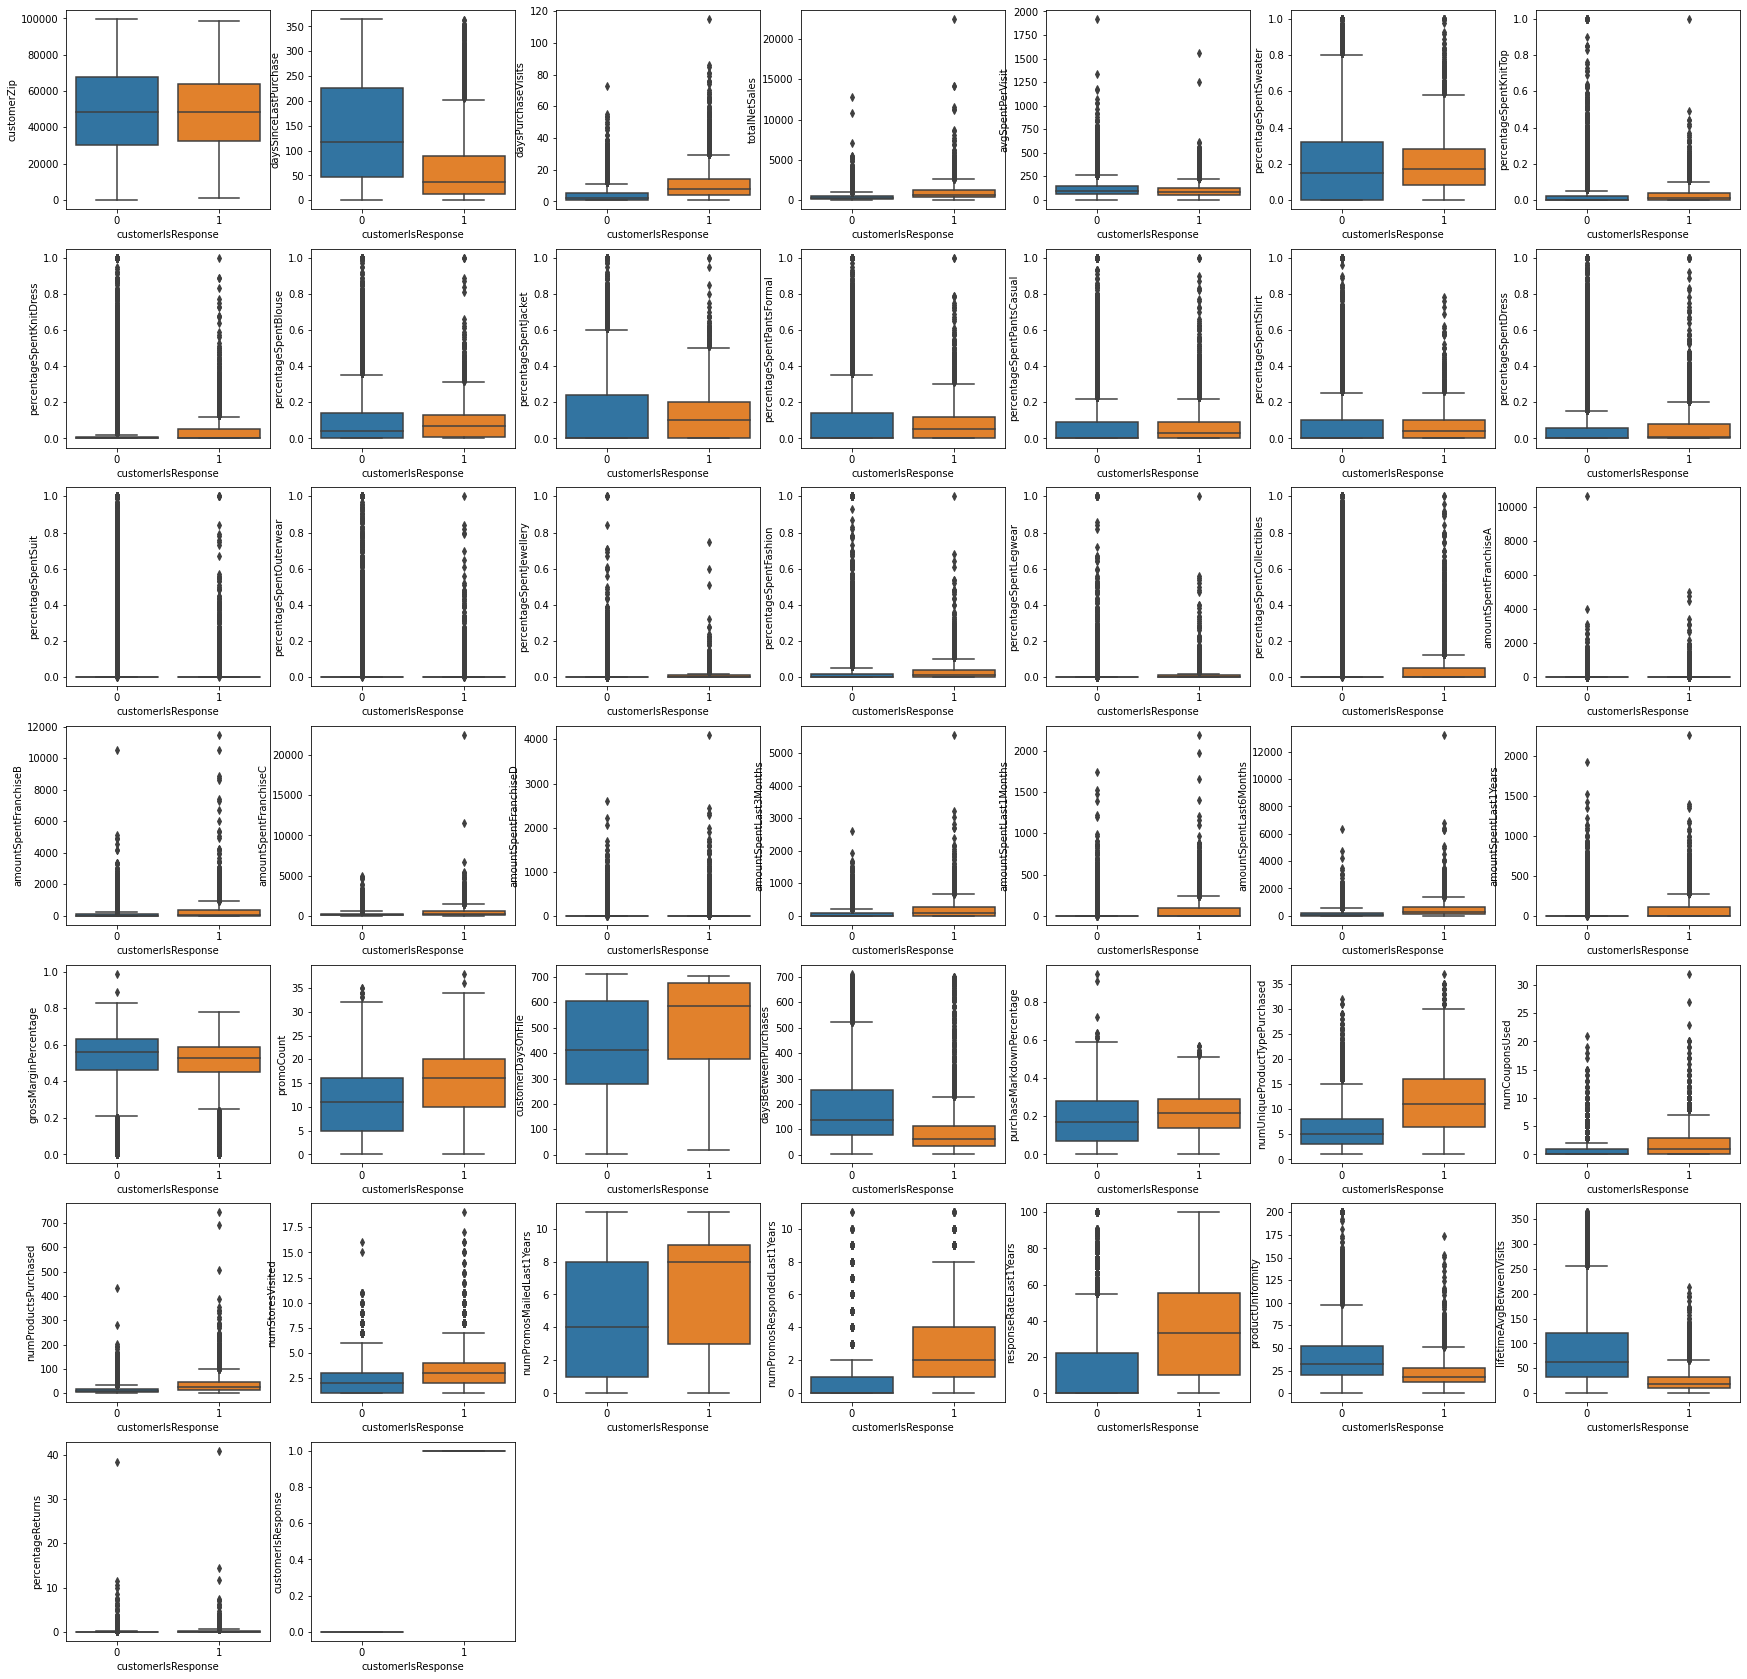

In [379]:
plt.figure(figsize = (30,30))
for i in range(len(numerical_columns)):
  plt.subplot(7,7,i+1)
  sns.boxplot(x = df_numerical["customerIsResponse"],y = df_numerical[numerical_columns[i]])

#Observations on features that have separability:
# - (daysSinceLastPurchase) - responding customers have shorter duration of days since last purchase 
# - (daysPurchaseVisits) - responding customers have a higher days where they purchased an item. 
# - (daysBetweenPurchases) - responding customers have shorter days between purchases
# - (totalNetSales) - Higher for responding customers

# - (grossMarginPercentage) - Higher for non responding
# - (promoCount) - Higher for responding customers 
# - (customerDaysOnFile) - Higher for responding customers

# - (purchaseMarkdownPercentage) - Higher for responding customers
# - (numUniqueProductTypePurchased) - higher for responding customers
# - (numCouponsUsed) - Higher for responding customers
# - (numProductsPurchase) - Higher for responding customers
# - (numStoresVisited) - Higher for responding customers 
# - (responseRateLast1Years) - Higher for responding
# - (productUniformity) - Lower for responding
# - lifetimeAvgBetweenVisits - Shorter for responding customers
# - avgSpentPerVisit  
# - percentageReturns 
#------------------------------------------------------------------ 
#  REMOVED VARIABLES - (Captured in responseRateLast1Years)
# (numPromosMailedLast1Years)
# (numPromoRespondedLast1Years)
#------------------------------------------------------------------

In [380]:
#Filtering out the columns that had separability based on visual analysis of the boxplot
columns_filter1 = ["daysSinceLastPurchase","daysPurchaseVisits","daysBetweenPurchases","totalNetSales","grossMarginPercentage","promoCount","customerDaysOnFile","purchaseMarkdownPercentage","numUniqueProductTypePurchased","numCouponsUsed","numProductsPurchased",
                   "numStoresVisited","responseRateLast1Years","productUniformity","lifetimeAvgBetweenVisits","avgSpentPerVisit","percentageReturns"]

df_numerical.drop(["numPromosMailedLast1Years","numPromosRespondedLast1Years"],axis = 1,inplace = True) #Dropping numpromosmailed and numpromos responded

df_numerical_1 = df_numerical[columns_filter1]  #df_numerical_1 containing the filtered features
df_numerical_1 = pd.concat([df_numerical_1,df_numerical["customerIsResponse"]],axis = 1) #df_numerical_1 added with target variable
df_numerical_2 = df_numerical.drop(columns_filter1,axis = 1) #df_numerical_2 with the remaining feature data and target variable

# 2.3.2
- Proceed to further analyse df_numerical_2 first. 
- Features are analysed in terms of relationship strength to the output variable
- Features are also inspected by checking distribution of the data points by visual graphs and distribution of data.
- Features are combined or dropped based on analysis of realtionship and relavance. 
- The final important features are then selected. 

In [381]:
# Checking correlation score for df_numerical_2.
# df_numerical_2 consists of data that are not so visually clear on the boxplot and also contains multiple versions of the same feature 
# Calculated the correlation between each feature in df_numerical_2 with the target variable. 

df_numerical_2.corr()["customerIsResponse"].sort_values(ascending =False)

# Observation of relatively high correlation scores:
# amountSpentLast1Months
# amountSpentLast1Years
# amountSpentLast6Months
# amountSpentLast3Months

# amountSpentFranchiseC
# amountSpentFranchiseB
# amountSpentFranchiseD
# amountSpentFranchiseA

customerIsResponse             1.000000
amountSpentLast6Months         0.310150
amountSpentLast3Months         0.267705
amountSpentFranchiseC          0.235242
amountSpentFranchiseB          0.206141
amountSpentLast1Months         0.204376
amountSpentLast1Years          0.160360
amountSpentFranchiseD          0.118598
amountSpentFranchiseA          0.052237
percentageSpentFashion         0.006262
percentageSpentLegwear         0.003862
percentageSpentKnitTop         0.002208
percentageSpentJewellery       0.002147
percentageSpentKnitDress      -0.003166
customerZip                   -0.008148
percentageSpentShirt          -0.008850
percentageSpentPantsCasual    -0.012057
percentageSpentOuterwear      -0.016670
percentageSpentBlouse         -0.018126
percentageSpentJacket         -0.018170
percentageSpentDress          -0.023498
percentageSpentPantsFormal    -0.024978
percentageSpentSweater        -0.030147
percentageSpentSuit           -0.034075
percentageSpentCollectibles   -0.046702


In [382]:
#To double confirm the Pearson Linear Correlation, its results was compared with f_classif correlation score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
X = df_numerical_2.drop(["customerIsResponse"],axis = 1)
y = df_numerical_2["customerIsResponse"]
fvalue_selector = SelectKBest(f_classif, k = 5)
X_kbest = fvalue_selector.fit_transform(X, y)
fScore_features = pd.DataFrame(X_kbest)

#Observation:
# amount spent in franchises and in the past years still seems to be an important feature for classification
# Other features like %spent have very small correlation to the target variable indicating that this feature might not be so significant in the output. 

# Comparing Pearson Linear Correlation and F-score, it was observed that the best 5 selected features also tally with those calculated by Pearson Correlation. 
# From this it can be deduced that the Pearson Correlation Method is a reliable method of checking the importance of the features. 
fScore_features.columns = ["amountSpentFranchiseB","amountSpentFranchiseC","amountSpentFranchise3","amountSpentLast1Months","amountSpentLast6Months"]
fScore_features.head()

,amountSpentFranchiseB,amountSpentFranchiseC,amountSpentFranchise3,amountSpentLast1Months,amountSpentLast6Months
0,0.0,368.46,0.00,0.00,0.00
1,0.0,258.00,138.00,55.99,258.00
2,0.0,77.00,0.00,0.00,0.00
3,0.0,846.06,104.94,0.00,373.87
4,0.0,87.44,87.44,0.00,87.44


Points to Note:
- Observed that a majority of the purchases occur at Franchise C. 
- There is very little spending on Franchise A, B and D. More focus can be directed towards these Franchises to analyse why there are very little spending on these Franchises as opposed to C and further steps can be taken to imporve spending at these Franchises. 
- There is significant amount of data from Franchise C. Feature correlation also indicates that Features B and C have high correlation to the output.
- Taking only 2 features and neglecting other expenditures at other franchise may not be an accurate method to entirely capture this feature variable. 
- Hence, it was decided to combine all these features into 1 feature using LDA & PCA and compare the correlation of the combined features. 

In [383]:
# Check the distribution of data within the AmountSpentFranchise features.

# There are 20665 values that are 0 (95%) at Franchise A
print(df_numerical_2["amountSpentFranchiseA"].value_counts(),) 
print("\n")

# There are 12104 values that are 0 (56%) at Franchise B
print(df_numerical_2["amountSpentFranchiseB"].value_counts()) 
print("\n")

#At franchise C, the data seems evenly distributed and there is spending at the Franchise 
print(df_numerical_2["amountSpentFranchiseC"].value_counts()) 
print("\n")

#There are 18856 that are 0 (87%) at Franchise D
print(df_numerical_2["amountSpentFranchiseD"].value_counts()) 

0.00      20665
20.00        24
10.00        19
15.00        14
39.00        13
          ...  
222.36        1
232.00        1
25.50         1
984.13        1
759.71        1
Name: amountSpentFranchiseA, Length: 769, dtype: int64


0.00      12104
49.00        79
39.00        77
59.00        71
29.00        63
          ...  
310.46        1
84.06         1
658.63        1
529.37        1
156.46        1
Name: amountSpentFranchiseB, Length: 6303, dtype: int64


98.00     145
49.00     123
78.00     105
68.00     104
59.00      95
         ... 
20.25       1
708.89      1
154.50      1
298.68      1
78.27       1
Name: amountSpentFranchiseC, Length: 11358, dtype: int64


0.00      18856
19.99        46
29.99        39
39.99        27
24.99        25
          ...  
948.87        1
322.15        1
30.48         1
121.94        1
42.48         1
Name: amountSpentFranchiseD, Length: 1969, dtype: int64


In [384]:
# Combining amountSpentFranchise using LDA and PCA. 

#LDA
X1_LDA = df_numerical_2[["amountSpentFranchiseA","amountSpentFranchiseB","amountSpentFranchiseC","amountSpentFranchiseD"]]
y1_LDA = df_numerical_2["customerIsResponse"]
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
LDA_feature1 = lda.fit_transform(X1_LDA,y1_LDA)
df_LDA1 = pd.DataFrame(LDA_feature1,columns = ["LDA_feature1"])

#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
PCA_feature1 = pca.fit_transform(X1_LDA)
df_PCA1 = pd.DataFrame(data = PCA_feature1, columns = ['PCA_feature1'])

# Compare the correlation score between the 2
# Correlation score increased for LDA feature, PCA feature score not as high as LDA
# LDA feature selected
df_AmountSpentFranchise = pd.concat([df_LDA1,df_PCA1,df_numerical_2["customerIsResponse"]],axis = 1)
df_AmountSpentFranchise.head()
df_AmountSpentFranchise.corr()

,LDA_feature1,PCA_feature1,customerIsResponse
LDA_feature1,1.000000,0.809543,0.325172
PCA_feature1,0.809543,1.000000,0.263241
customerIsResponse,0.325172,0.263241,1.000000


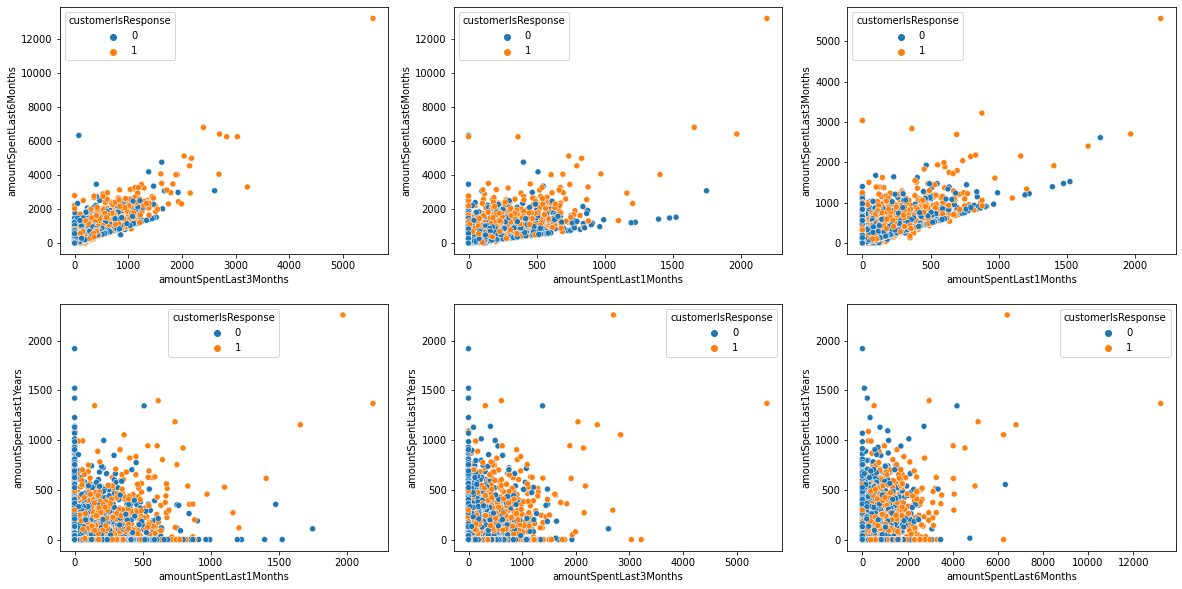

In [385]:
# Analyse the amountSpentLast features
# Correlation scores for each to target are:
# amountSpentLast3Months           0.267705
# amountSpentLast1Months           0.204376
# amountSpentLast6Months           0.310150
# amountSpentLast1Years            0.160360
# Plot the scatter plot depicting the distribution of the data in relation to one another. 

plt.figure(figsize = (20,10))
plt.subplot(2,3,1)
sns.scatterplot(x = df_numerical_2["amountSpentLast3Months"],y = df_numerical_2["amountSpentLast6Months"],hue = df_numerical_2["customerIsResponse"])

plt.subplot(2,3,2)
sns.scatterplot(x = df_numerical_2["amountSpentLast1Months"],y = df_numerical_2["amountSpentLast6Months"],hue = df_numerical_2["customerIsResponse"])

plt.subplot(2,3,3)
sns.scatterplot(x = df_numerical_2["amountSpentLast1Months"],y = df_numerical_2["amountSpentLast3Months"],hue = df_numerical_2["customerIsResponse"])

plt.subplot(2,3,4)
sns.scatterplot(x = df_numerical_2["amountSpentLast1Months"],y = df_numerical_2["amountSpentLast1Years"],hue = df_numerical_2["customerIsResponse"])

plt.subplot(2,3,5)
sns.scatterplot(x = df_numerical_2["amountSpentLast3Months"],y = df_numerical_2["amountSpentLast1Years"],hue = df_numerical_2["customerIsResponse"])

plt.subplot(2,3,6)
sns.scatterplot(x = df_numerical_2["amountSpentLast6Months"],y = df_numerical_2["amountSpentLast1Years"],hue = df_numerical_2["customerIsResponse"])

In [386]:
# Individually, these features do not seem to have that much clarity on separability by each class. 
# Decide to combine these features using 3 methods given that these features are similar and related to one another
# The feature will account for spending at different periods of time in the past 1 year as a single value / feature:
# 3 methods of combinng were implemented which were.
# 1) Sum of spending over the past year (1 Months + 3 Months + 6 Months + 1 Years)
# 2) LDA
# 3) PCA
# And compared the correlation of these combined features to the target.

#Summation
df_AmountSpentYearCum = df_numerical_2["amountSpentLast1Months"] + df_numerical_2["amountSpentLast3Months"] + df_numerical_2["amountSpentLast6Months"] + df_numerical_2["amountSpentLast1Years"]
df_AmountSpentYearCum = pd.DataFrame(data = df_AmountSpentYearCum,columns = ["AmountSpentYearCum"])

# LDA
X2_LDA = df_numerical_2[["amountSpentLast1Months","amountSpentLast3Months","amountSpentLast6Months","amountSpentLast1Years"]]
y2_LDA = df_numerical_2["customerIsResponse"]
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
LDA_feature2 = lda.fit_transform(X2_LDA,y2_LDA)
df_LDA2 = pd.DataFrame(LDA_feature2,columns = ["LDA_feature2"])

# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
PCA_feature2 = pca.fit_transform(X2_LDA)
df_PCA2 = pd.DataFrame(data = PCA_feature2, columns = ['PCA_feature2'])

# Checking Correlation
# LDA has the highest correlation with the output. Hence LDA on combined expenditure over the past year is chosen. 
df_AmountSpentPastYear = pd.concat([df_LDA2,df_PCA2,df_AmountSpentYearCum,df_numerical_2["customerIsResponse"]],axis = 1)
df_AmountSpentPastYear.head()
df_AmountSpentPastYear.corr()

,LDA_feature2,PCA_feature2,AmountSpentYearCum,customerIsResponse
LDA_feature2,1.000000,0.983531,0.986115,0.317902
PCA_feature2,0.983531,1.000000,0.981669,0.312667
AmountSpentYearCum,0.986115,0.981669,1.000000,0.313488
customerIsResponse,0.317902,0.312667,0.313488,1.000000


# 2.3.3
- Proceed to further analyse df_numerical_1.
- Similarly, features are analysed in terms of relationship strength to the output variable
- Features are also inspected by checking distribution of the data points by visual graphs and distribution of data.
- Features are dropped or combined based on analysis of importance
- The final important features are then selected.

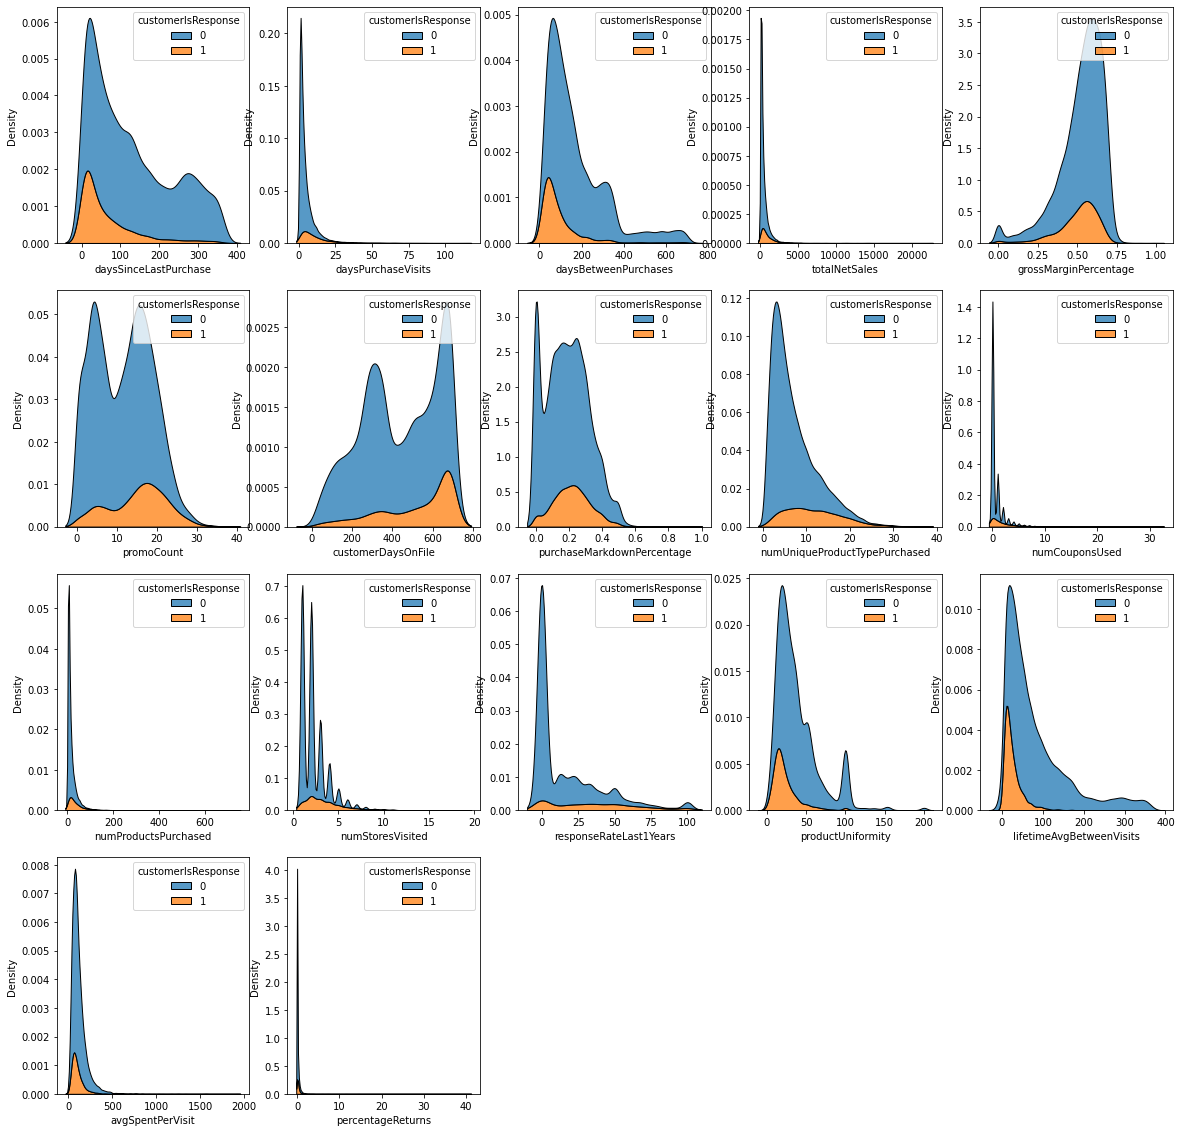

In [387]:
# Checking Distribution of Data in df_numerical_1 using kde plot
# Observe some difference (though slight) in the distribution of data between class 0 and 1.
plt.figure(figsize=(20,20))   #Figure size
plt.title("Distribution plot of data")  #Title of the plot
column_names = df_numerical_1.drop(["customerIsResponse"],axis = 1).columns #Obtaining the column names
for i in range(1,column_names.shape[0]+1):
  plt.subplot(4,5,i)
  sns.kdeplot(data = df_numerical_1, x = column_names[i-1],hue = "customerIsResponse",multiple = "stack") #Plotting the KDE plot for each variable

In [388]:
# Checking the correlation of each feature variable to the output
# The correlation values are sorted in descending order. 
# The magnitude of the value is looked at. 
# Negative value indicates that the feature and output variable change have an inverse correlation. 
df_numerical_1.corr()["customerIsResponse"].sort_values(ascending = False)

customerIsResponse               1.000000
daysPurchaseVisits               0.407606
numUniqueProductTypePurchased    0.372776
numProductsPurchased             0.364063
responseRateLast1Years           0.331459
totalNetSales                    0.322801
numCouponsUsed                   0.307182
numStoresVisited                 0.304242
promoCount                       0.226649
customerDaysOnFile               0.184413
purchaseMarkdownPercentage       0.105861
percentageReturns                0.085100
grossMarginPercentage           -0.058237
avgSpentPerVisit                -0.067469
daysBetweenPurchases            -0.227600
productUniformity               -0.230183
daysSinceLastPurchase           -0.265044
lifetimeAvgBetweenVisits        -0.307191
Name: customerIsResponse, dtype: float64

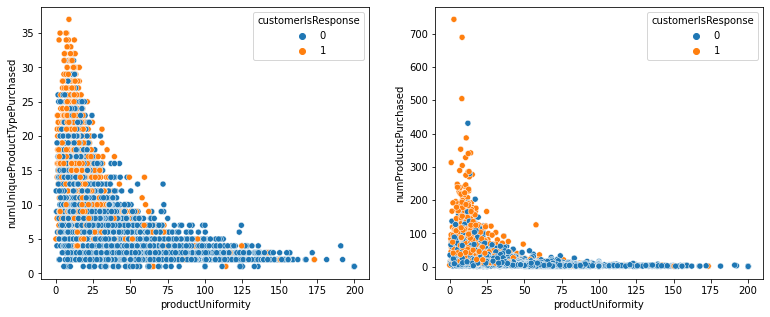

In [389]:
#Visualizing the distribution of data between "productUniformity", "numUniqueProductTypePurchased" and "numProductsPurchased"
plt.figure(figsize = (20,5))
plt.subplot(1,3,1)
sns.scatterplot(x = df_numerical_1["productUniformity"],y = df_numerical_1["numUniqueProductTypePurchased"],hue = df_numerical_1["customerIsResponse"])
plt.subplot(1,3,2)
sns.scatterplot(x = df_numerical_1["productUniformity"],y = df_numerical_1["numProductsPurchased"],hue = df_numerical_1["customerIsResponse"]) 

# It was observed that for both variables, a pattern where the product uniformity is low for that of responding customers as compared to non responding customers. 
# Also observed that the number of products purchased and the num of unique products purchase tend to be higher for that of responding customers.

In [390]:
# On a single dimensional plane, it was observed that these 3 features aren't that easily separable between the 2 target class. 
# However on a 2 dimensional plane, it is much easier to separate these 2 classes. 
# In addition, looking at how these "numUniqueProductTypePurchased" and "numProductsPurchased" are closely related to "productUniformity" at approximately -0.4 for both;
# It was decided to combine these 3 features using LDA or PCA to find an axis that best separates between classes using these 3 features. 
# Then, compared LDA and PCA transformed data relationship to the target variable. 

#LDA Method
X3_LDA = df_numerical_1[["numUniqueProductTypePurchased","productUniformity","numProductsPurchased"]] 
y3_LDA = df_numerical_1["customerIsResponse"]
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
LDA_feature3 = lda.fit_transform(X3_LDA,y3_LDA)
df_LDA3 = pd.DataFrame(LDA_feature3,columns = ["LDA_feature3"])

#PCA Method 
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
PCA_feature3 = pca.fit_transform(X3_LDA)
df_PCA3 = pd.DataFrame(PCA_feature3,columns = ["PCA_feature3"])

#Printing the correlation matrix for LDA and PCA to target for comparison. 
df_ProdUnique = pd.concat([df_LDA3,df_PCA3,df_numerical["customerIsResponse"]],axis = 1)
df_ProdUnique.corr()

,LDA_feature3,PCA_feature3,customerIsResponse
LDA_feature3,1.000000,0.865684,0.387609
PCA_feature3,0.865684,1.000000,0.335547
customerIsResponse,0.387609,0.335547,1.000000


In [391]:
# There are also another 2 features of daysSinceLastPurchase and daysPurchaseVisits
# These 2 features can be related to one another as they represent the purchasing rate by days. 
# These 2 features are also correlated strongly by Pearson Correlation. 
# It was decided to combine these 2 features as a single feature using LDA and PCA
# The final method is selected based on strength of correlation to target. 

#LDA Method
X4_LDA = df_numerical_1[["daysSinceLastPurchase","daysPurchaseVisits"]] 
y4_LDA = df_numerical_1["customerIsResponse"]
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
LDA_feature4 = lda.fit_transform(X4_LDA,y4_LDA)
df_LDA4 = pd.DataFrame(LDA_feature4,columns = ["LDA_feature4"])

#LDA Method
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
PCA_feature4 = pca.fit_transform(X4_LDA)
df_PCA4 = pd.DataFrame(PCA_feature4,columns = ["PCA_feature4"])

#Printing correlation for comparison. 
df_DaysPurchase = pd.concat([df_LDA4,df_PCA4,df_numerical["customerIsResponse"]],axis = 1)
df_DaysPurchase.corr()

,LDA_feature4,PCA_feature4,customerIsResponse
LDA_feature4,1.000000,-0.634425,0.418532
PCA_feature4,-0.634425,1.000000,-0.265527
customerIsResponse,0.418532,-0.265527,1.000000


# 2.3.4 
- Combining selected features from df_numerical_1 and df_numerical_2 into a single final numerical feature dataframe df_numerical_final


In [392]:
# # FOR REEFERENCE ONLY
# # List of dataframes with all the features created from LDA
# df_AmountSpentFranchise.head()
# df_AmountSpentPastYear.head()
# df_ProdUnique.head()
# df_DaysPurchase.head()

In [393]:
# Combining all of the combined features using LDA
df_numerical_final1 = pd.concat([df_AmountSpentFranchise["LDA_feature1"],df_AmountSpentPastYear["LDA_feature2"],df_ProdUnique["LDA_feature3"],df_DaysPurchase["LDA_feature4"]],axis = 1)
# Renaming the columns after concatenation
df_numerical_final1.columns = ["AmountSpentFranchise","AmountSpentPastYear","ProdUnique","DaysPurchase"]

# The remaining selected features left in df_numerical_1 that were not combined. These features are individual features from the raw data. 

# The following features were removed with reason why:
# grossMarginPercentage            - corr low (-0.058237) and boxplot and KDE Plot does't show much separation between each class. 
# purchaseMarkdownPercentage       - corr low (0.105861) and there isnt much separation seen in he boxplot. KDE graph also shows that location of peak for both classes are at the same location. 
df_numerical_final2 = df_numerical_1[["totalNetSales","responseRateLast1Years","numCouponsUsed","promoCount","numStoresVisited"]]

# Combining all of the features into a single dataframe "df_numerical_final"
df_numerical_final = pd.concat([df_numerical_final1,df_numerical_final2],axis = 1)
df_numerical_final.head()

,AmountSpentFranchise,AmountSpentPastYear,ProdUnique,DaysPurchase,totalNetSales,responseRateLast1Years,numCouponsUsed,promoCount,numStoresVisited
0,-0.181373,-0.669534,0.081722,-0.668619,368.46,0.00,1,17,1
1,-0.362154,0.041141,-0.177348,0.164253,258.00,50.00,0,14,1
2,-0.658384,-0.588667,-1.140836,-0.985028,77.00,0.00,0,10,1
3,0.600280,0.599712,1.255857,0.596269,846.06,66.67,3,24,1
4,-0.641297,-0.399147,-0.507955,-0.393742,87.44,0.00,0,0,1


# 2.4 Analysing Categorical Data

# 2.4.1
- The categorical features are inspected
- Correlation of features to target variable is studied. 


In [394]:
# Checking the feature columns
df_categorical.head()

,usesCreditCard,customerFaveBrandID,storeLocID,customerContactGiven,isWebShopper,mClusterType,customerIsResponse
0,0,11,7,N,0,10,0
1,1,11,7,Y,0,10,1
2,0,11,7,N,0,16,0
3,1,11,7,Y,0,10,0
4,0,11,7,Y,0,20,0


In [395]:
# The "customerContactGiven" feature is in object / string type. This makes it difficult to further analyse and process the feature column.
# Hence LabelEncoding was used to conver the object data into int format where N = 0 and Y = 1. 
from sklearn import preprocessing
LabelEncoder = preprocessing.LabelEncoder()
LabelEncoder.fit(df_categorical["customerContactGiven"])
df_categorical["enc_customerContactGiven"] = LabelEncoder.transform(df_categorical["customerContactGiven"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [396]:
# Checking that the column created with label encoded "customerContactGiven" called "enc_customerContactGiven" is of int type data. 
df_categorical.dtypes

usesCreditCard               int64
customerFaveBrandID          int64
storeLocID                   int64
customerContactGiven        object
isWebShopper                 int64
mClusterType                 int64
customerIsResponse           int64
enc_customerContactGiven     int64
dtype: object

In [397]:
# Filter condition to only select int data types from the dataframe for MI scores calculation. 
# Drop the target output and the object column of "customerContactGiven"
discrete_features = df_categorical.drop(["customerIsResponse","customerContactGiven"],axis=1).dtypes == int

# Mutual info classification function that returns a series of the MI score for the input categorical features given to the target variable. 
# Create a generalized function
def mi_score(X,y,discrete_features):
  from sklearn.feature_selection import mutual_info_classif                 #Import library
  mi_score = mutual_info_classif(X,y,discrete_features = discrete_features) #calling the mutual_info_classif function on the feature data
  mi_score = pd.Series(mi_score,name = "MI Scores",index = X.columns)       # converting the results into a pandas series
  mi_score = mi_score.sort_values(ascending = False)                        # Sorting the values in descending order. 
  return mi_score                                                           # Return value which is the score.         

df_categorical_features = df_categorical.drop(["customerIsResponse","customerContactGiven"],axis = 1) # Defining the data range to input into the function
mi_score(df_categorical_features,df_categorical["customerIsResponse"],discrete_features)              # Calling the function and printing out the score

storeLocID                  0.036856
usesCreditCard              0.028327
isWebShopper                0.009770
enc_customerContactGiven    0.006483
customerFaveBrandID         0.004297
mClusterType                0.001286
Name: MI Scores, dtype: float64

# 2.4.2
- Visualize the categorical data
- Final feature selection

#### Points to Note
- From the plot it was seen that mClusterType & storeLocID does not really correlate or help to distinguish the output. There are too many categories in these features. 
- It was also observed that customerFaveBrandID generally concentrates on 11 and 16 as compared to the rest which would indicate that customers from brands 15,17,18 and 19 aren't that many. 
- However it does not seem like a suitable data as very little info on 15,17,18 and 19. There are also too many category. This feature's MI score is also very low. Hence it will be ignored.
- Store LOC ID is also another categorical feature. Though it has the highest MI score, but there are too many IDs which makes them irrelevant to the response. 
- Those with credit card usually respond and vice versa. This feature looks like there is a prominent separation between each class. It is also the 2nd highest MI score. 
- A major portion of the shoppers are also non webshoppers. There are very little webshoppers that constitute the store's clientele. 


<Figure size 432x288 with 0 Axes>

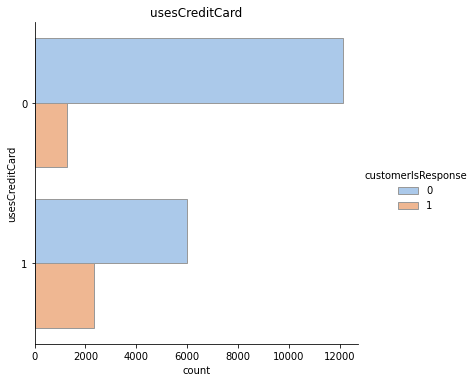

<Figure size 432x288 with 0 Axes>

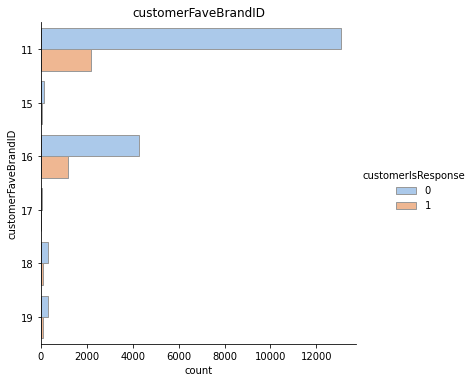

<Figure size 432x288 with 0 Axes>

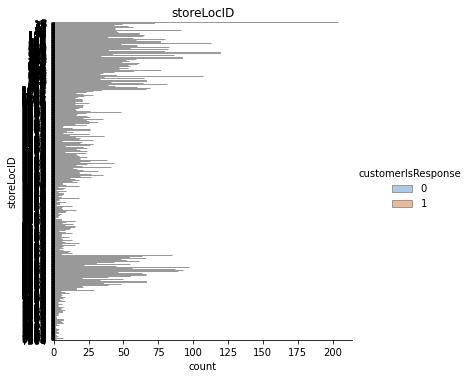

<Figure size 432x288 with 0 Axes>

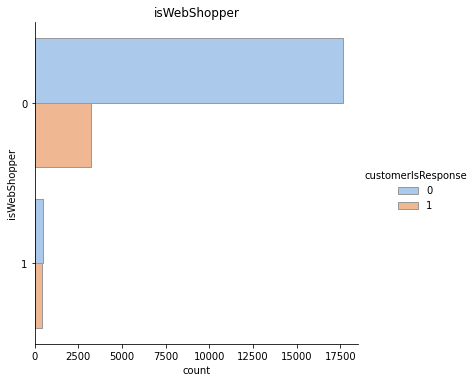

<Figure size 432x288 with 0 Axes>

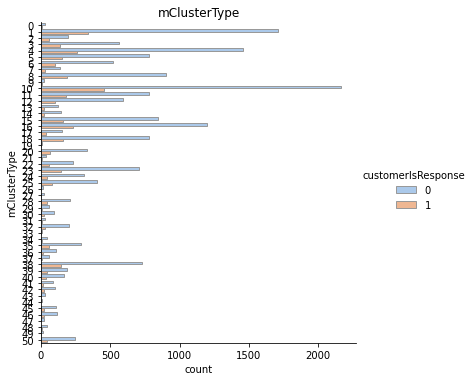

<Figure size 432x288 with 0 Axes>

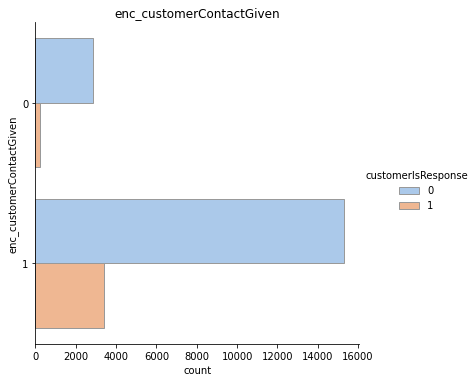

In [398]:
# To select and finalise the categorical data to use in the model, visualization was done on each categorical features to determine if each had significant separation of values between each class. 

categorical_columns = df_categorical_features.columns    # Define categorical features column names

# Use sns catplot for each feature to visualize the number of each categorical data count for each class. 
for i in range(len(categorical_columns)): 
  plt.figure()  
  sns.catplot(y=categorical_columns[i], hue="customerIsResponse", kind="count",palette="pastel", edgecolor=".6",data=df_categorical)
  plt.title(categorical_columns[i])

#### Points to note:
- Those who have credit card typically respond
- Webshopper typically respond more. 
- Customer Contact given show that those who have given their contact number typically respond more. However it is only marginal. Hence this feature will be ignored. 

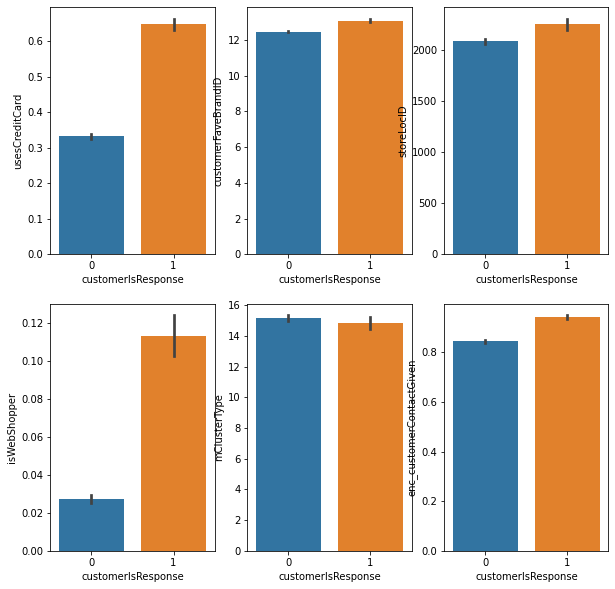

In [399]:
# Plotting barplot to visualize the distribution of categorical data for each target class. 
# This plot takes into account the concentration as opposed to the count as per previous catplot and normalizes the quantity to a comparable level. 
plt.figure(figsize = (10,10))
for i in range(len(categorical_columns)):
  plt.subplot(2,3,i+1)
  sns.barplot(x = df_categorical["customerIsResponse"],y = df_categorical[categorical_columns[i]])

In [400]:
# The final 2 selected features
df_categorical_final = df_categorical[["usesCreditCard","isWebShopper"]]
df_categorical_final.head()

,usesCreditCard,isWebShopper
0,0,0
1,1,0
2,0,0
3,1,0
4,0,0


In [401]:
#Defining the One Hot Encoder
from sklearn.preprocessing import OneHotEncoder
OneHot = OneHotEncoder(handle_unknown = "ignore",sparse = False)

# One Hot encoding the two categorical data selected. 
OH_CreditCard = pd.DataFrame(OneHot.fit_transform(df_categorical[['usesCreditCard']]),columns = ["CreditCardYes","CreditCardNo"])
OH_WebShopper = pd.DataFrame(OneHot.fit_transform(df_categorical[['isWebShopper']]),columns = ["WebShopperYes","WebShopperNo"])

# Combining the 2 features into a single dataframe
# The final dataframe is called as "df_categorical_final"
df_categorical_final = pd.concat([OH_CreditCard,OH_WebShopper],axis = 1)
df_categorical_final.head()

,CreditCardYes,CreditCardNo,WebShopperYes,WebShopperNo
0,1.0,0.0,1.0,0.0
1,0.0,1.0,1.0,0.0
2,1.0,0.0,1.0,0.0
3,0.0,1.0,1.0,0.0
4,1.0,0.0,1.0,0.0


#2.5 Merging Processed Data (Numerical + Categorical)

In [402]:
# Merging the numerical and categorical data together as a final dataframe
df_final = pd.concat([df_numerical_final,df_categorical_final,df1["customerIsResponse"]],axis = 1)
df_final.head()

,AmountSpentFranchise,AmountSpentPastYear,ProdUnique,DaysPurchase,totalNetSales,responseRateLast1Years,numCouponsUsed,promoCount,numStoresVisited,CreditCardYes,CreditCardNo,WebShopperYes,WebShopperNo,customerIsResponse
0,-0.181373,-0.669534,0.081722,-0.668619,368.46,0.00,1,17,1,1.0,0.0,1.0,0.0,0
1,-0.362154,0.041141,-0.177348,0.164253,258.00,50.00,0,14,1,0.0,1.0,1.0,0.0,1
2,-0.658384,-0.588667,-1.140836,-0.985028,77.00,0.00,0,10,1,1.0,0.0,1.0,0.0,0
3,0.600280,0.599712,1.255857,0.596269,846.06,66.67,3,24,1,0.0,1.0,1.0,0.0,0
4,-0.641297,-0.399147,-0.507955,-0.393742,87.44,0.00,0,0,1,1.0,0.0,1.0,0.0,0


In [403]:
# Checking the shape of the final merged dataset
df_final.shape

(21740, 14)

#3 Data Preparation for Model Implementation (Split / Scaling / Normalization / Subsampling)
- 3 Sets of data were produced 
1. Non - scaled Data
2. Standard Scaled Data 
3. Normalized Data

- For each dataset there is a subset of data that comprise of: 
1. Normal data without any alterations to the number of data points
2. Under Sampled data where the majority is levelled in quantity to the minority class.
3. Upsampled data where the minority is upsampled to meet the quantity of the majority class
4. Balanced Sampling where both upsampling and downsampling is carried out. 

#3.1 Data Set 1 - Non - Scaled Data
- 4 Forms of data was created
- **Normal data** without any over / undersampling as per the quantity and ratio of the raw data for each class
- **Under sampling** where the concentrated data is downsampled to match the quantity of the minority data
-**Over sampling** where the minority data is upsampled to match the quantity of the majority class.
- **Balanced sampling** where both under and over sampling is carried out to balance the data at midway. 
- All data sets are split with a 70-30 % train-test ratio.

In [404]:
# Importing sklearn library for data splitting. 
from sklearn.model_selection import train_test_split

In [405]:
# Normal Data without any data quantity manipulation

# Splitting the input and output from df_final
X = df_final.drop(["customerIsResponse"],axis = 1)   # Features
y = df_final["customerIsResponse"]                   # Output

# Split with a 70/30% train/test ratio. 
# Stratify function is turned on to even split each class between training and testing. 
(X_train,X_test,y_train,y_test) = train_test_split(X,y,test_size = 0.3,random_state = 0,stratify = y)

In [406]:
# Undersampling.
# The no response class is downsampled to match the quantity of the response class

df_under0 = df_final.loc[df_final["customerIsResponse"]==0].sample(3611)      # Sample 3611 data points of class 0
df_under1 = df_final.loc[df_final["customerIsResponse"]==1]                   # Taking the entire group of class 1
df_under = pd.concat([df_under0,df_under1])                                   # Combining both class 0 and 1
df_under = df_under.sample(frac=1).reset_index(drop=True)                     # Shuffle data and reset index.
X_under = df_under.drop(["customerIsResponse"],axis =1)                       # X value undersample set. Drop target
y_under = df_under["customerIsResponse"]                                      # y_value undersample set. Target. 

# Data splitting for training and testing. 
(X_train_under,X_test_under,y_train_under,y_test_under) = train_test_split(X_under,y_under,test_size = 0.3,random_state = 0,stratify = y_under)

In [407]:
# Oversampling method
# SMOTE method was used to upsample the minority class. In SMOTE KNN is used to generate synthetic dataset for the minority class for each feature. 
from imblearn.over_sampling import SMOTE                    # Import library
smote_sample = SMOTE(sampling_strategy = "minority")        # Define SMOTE function
X_SMOTE, y_SMOTE =smote_sample.fit_resample(X,y)            # Fitting SMOTE to the X and y data

X_SMOTE = pd.DataFrame(X_SMOTE,columns = X_train.columns)   # X SMOTE data
y_SMOTE = pd.Series(y_SMOTE,name = "customerIsResponse")    # y SMOTE data.

# Data splitting for training and testing. 
(X_train_SMOTE,X_test_SMOTE,y_train_SMOTE,y_test_SMOTE) = train_test_split(X_SMOTE,y_SMOTE,test_size = 0.3,random_state = 0,stratify = y_SMOTE)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [408]:
# Balanced Sampling
# In balanced method: Upsampled the minority class to double its size which is 7222. The majority class is downsampled to 7222 data points as well. 
df_balance0 = df_final.loc[df_final["customerIsResponse"]==0].sample(7222)       # Downsample majority class
df_balance1 = df_final.loc[df_final["customerIsResponse"]==1]                    # Minority class
df_balance = pd.concat([df_balance0,df_balance1])                                # Combine downsampled majority and minority class. 
df_balance = df_balance.sample(frac=1).reset_index(drop=True)                    # Shuffle the data and reset index. 

X_balance = df_balance.drop(["customerIsResponse"],axis =1)                      # Drop target variable
y_balance = df_balance["customerIsResponse"]                                     # Target Variable
smote_balance = SMOTE(sampling_strategy = "minority")                            # Define SMOTE function
X_balance_SMOTE, y_balance_SMOTE = smote_balance.fit_resample(X_balance,y_balance) #Fit to the balanced data to form 14444 data points with equal quantities for each class. 

X_balance_SMOTE = pd.DataFrame(X_balance_SMOTE,columns = X_train.columns)        # Renaming columns
y_balance_SMOTE = pd.Series(y_balance_SMOTE,name = "customerIsResponse")

# Data splitting for training and testing. 
(X_train_Balance,X_test_Balance,y_train_Balance,y_test_Balance) = train_test_split(X_balance_SMOTE,y_balance_SMOTE,test_size = 0.3,random_state = 0,stratify = y_balance_SMOTE)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


# 3.2 Data Set 2 - StandardScaling
- 3 Forms of data was created
- Similar to Data Set 1, the difference only being
1. The original data is scaled
2. No undersampling was done as preliminary testing on the undersampled data showed very little improvement in the model performance and it is throwing a lot of important data. 
- Upsampling and Balanced Sampling was carried out. 
- All data sets are split with a 70-30 % train-test ratio.

In [409]:
#Creating Standard Scaler Function
def standard_scale(X,y,columns):
  from sklearn.preprocessing import StandardScaler
  std_scaler = StandardScaler()
  X_scaled = pd.DataFrame(std_scaler.fit_transform(X.drop(["CreditCardYes","CreditCardNo","WebShopperYes","WebShopperNo"],axis = 1)),columns = columns)
  X_scaled = pd.concat([X_scaled,X[["CreditCardYes","CreditCardNo","WebShopperYes","WebShopperNo"]].reset_index(drop = True)],axis = 1)
  y_scaled = y
  return X_scaled, y

In [410]:
# Normal Standar Scaler Data
(X_scale, y_scale) = standard_scale(X, y , df_numerical_final.columns)
(X_train_scale,X_test_scale,y_train_scale,y_test_scale) = train_test_split(X_scale,y_scale,test_size = 0.3,random_state = 0,stratify = y_scale)

In [411]:
# Upsampled Standar Scaler Data
from imblearn.over_sampling import SMOTE
smote_sample = SMOTE(sampling_strategy = "minority")

#Fit to the scaled data for upsampling
X_scale_SMOTE, y_scale_SMOTE =smote_sample.fit_resample(X_scale,y_scale)
X_scale_SMOTE = pd.DataFrame(X_scale_SMOTE,columns = X_scale.columns)
y_scale_SMOTE = pd.Series(y_scale_SMOTE,name = "customerIsResponse")

# Data splitting for training and testing. 
(X_trainScale_SMOTE,X_testScale_SMOTE,y_trainScale_SMOTE,y_testScale_SMOTE) = train_test_split(X_scale_SMOTE,y_scale_SMOTE,test_size = 0.3,random_state = 0,stratify = y_scale_SMOTE)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [412]:
# Balanced Standar Scaler Data
df_balance_scale0 = df_final.loc[df_final["customerIsResponse"]==0].sample(7222)
df_balance_scale1 = df_final.loc[df_final["customerIsResponse"]==1]

# Combine majority class downsampled with minority class
df_balance_scale = pd.concat([df_balance_scale0,df_balance_scale1])
df_balance_scale = df_balance_scale.sample(frac=1).reset_index(drop=True)

#Split to X and y values
X_balance_scale = df_balance_scale.drop(["customerIsResponse"],axis =1)
y_balance_scale = df_balance_scale["customerIsResponse"]

#Define upsampling function
smote_balance = SMOTE(sampling_strategy = "minority")

# Fit the data for upsampling
X_balance_scale, y_balance_scale = smote_balance.fit_resample(X_balance_scale,y_balance_scale)
X_balance_scale = pd.DataFrame(X_balance_scale,columns = X_scale.columns)
y_balance_scale = pd.Series(y_balance_scale,name = "customerIsResponse")

# Train test split
(X_trainScale_Balance,X_testScale_Balance,y_trainScale_Balance,y_testScale_Balance) = train_test_split(X_balance_scale,y_balance_scale,test_size = 0.3,random_state = 0,stratify = y_balance_scale)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


# 3.3 Data Set 3 - Normalization
- Similar to Section 3.2, 3 forms of dataset were created. 
- All data sets are split with a 70-30 % train-test ratio.

In [413]:
#Creating MinMax Scaler Function for Normalization
def MinMax_scale(X,y,columns):
  from sklearn.preprocessing import MinMaxScaler
  MinMax_scaler = MinMaxScaler()
  X_norm = pd.DataFrame(MinMax_scaler.fit_transform(X.drop(["CreditCardYes","CreditCardNo","WebShopperYes","WebShopperNo"],axis = 1)),columns = columns)
  X_norm = pd.concat([X_norm,X[["CreditCardYes","CreditCardNo","WebShopperYes","WebShopperNo"]].reset_index(drop = True)],axis = 1)
  y_norm = y
  return X_norm, y_norm

In [414]:
# Normal Normalized data
(X_norm, y_norm) = MinMax_scale(X, y,df_numerical_final.columns)
(X_train_norm,X_test_norm,y_train_norm,y_test_norm) = train_test_split(X_norm,y_norm,test_size = 0.3,random_state = 0,stratify = y_norm)

In [415]:
# Upsampled Normalized data.
from imblearn.over_sampling import SMOTE
smote_sample = SMOTE(sampling_strategy = "minority")

# Fit to the normalized data for upsampling
X_norm_SMOTE, y_norm_SMOTE =smote_sample.fit_resample(X_norm,y_norm)
X_norm_SMOTE = pd.DataFrame(X_norm_SMOTE,columns = X_norm.columns)
y_norm_SMOTE = pd.Series(y_norm_SMOTE,name = "customerIsResponse")

# Train Test Split
(X_trainNorm_SMOTE,X_testNorm_SMOTE,y_trainNorm_SMOTE,y_testNorm_SMOTE) = train_test_split(X_norm_SMOTE,y_norm_SMOTE,test_size = 0.3,random_state = 0,stratify = y_norm_SMOTE)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [416]:
# Balanced Normalizaed data
df_balance_norm0 = df_final.loc[df_final["customerIsResponse"]==0].sample(7222)
df_balance_norm1 = df_final.loc[df_final["customerIsResponse"]==1]

# Combine downsampled majority data and the minority data
df_balance_norm = pd.concat([df_balance_norm0,df_balance_norm1])
df_balance_norm = df_balance_norm.sample(frac=1).reset_index(drop=True)

# Split to X and y
X_balance_norm = df_balance_norm.drop(["customerIsResponse"],axis =1)
y_balance_norm = df_balance_norm["customerIsResponse"]

# Define function for upsampling
smote_balance = SMOTE(sampling_strategy = "minority")

# Fit the data for upsampling
X_balance_norm_SMOTE, y_balance_norm_SMOTE = smote_balance.fit_resample(X_balance_norm,y_balance_norm)
X_balance_norm_SMOTE = pd.DataFrame(X_balance_norm_SMOTE,columns = X_norm.columns)
y_balance_norm_SMOTE = pd.Series(y_balance_norm_SMOTE,name = "customerIsResponse")

# Train test split. 
(X_trainNorm_Balance,X_testNorm_Balance,y_trainNorm_Balance,y_testNorm_Balance) = train_test_split(X_balance_norm_SMOTE,y_balance_norm_SMOTE,test_size = 0.3,random_state = 0,stratify = y_balance_norm_SMOTE)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


# 4. Model Development

# 4.1 Building Generalized Functions 

In [417]:
# General Libraries used
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

In [418]:
# Creating a generalized function to run various machine learning models on multiple datasets
def model_run(model,X_train,y_train,X_test,y_test,ratio):
  model.fit(X_train, y_train)            # Fit the model to the training data             
  y_pred =  model.predict(X_test)        # Feed the testing data to the trained model for prediction       
  
  print("Accuracy:",metrics.accuracy_score(y_test,y_pred))          # Print out the accuracy of the model
  report = classification_report(y_test,y_pred,output_dict=True )   # Save the classification report in a report variable in the form of a dictionary. 

  print("\nClassification Report:")
  print(classification_report(y_test,y_pred))                       # Print the classification report
  
  score = calculate_performance(report["1"]["recall"],report["0"]["recall"],ratio)    # Calculate the score for model performance evaluation. Refer Explanation on calculate_performance function. 
  print("Model Score: ",score)              # Print the score
  
  # Plot the heatmap of the confusion matrix
  print("\nConfusion Matrix:")  
  plt.figure()
  sns.heatmap(confusion_matrix(y_test,y_pred),annot = True,fmt = '.2f')
  
  # Returns the report and score variables
  return report, score

- To evaluate the models' performance, a function called "calculate_performance" was created. 
- Based on the evaluation criteria given in the problems statement as shown in the Figure Below, the performance score was evaluated with the following formula
#### 13.97*(TPR - FNR) + 2*(TNR - FPR)
#### Given FNR = 1 - TPR & FPR = 1 - TNR, The equation was rearranged to form:
#### 13.97*(2*TPR-1) + 2*(2*TNR-1) ----- Equation 1
#### Considering also that upsampling and downsampling of the data was carried out, Another factor to consider was also the purity of the original data as compared to the final data. Hence a ratio / purity parameter was considered which is the ratio of the original data to the entire dataset size. This ratio is multiplied with the calculated score from Equation 1. The final Equation for evaluation is:
#### Final Model Score = (Total Original Data Points Size / Total Dataset Size) * 13.97*(2*TPR-1) + 2*(2*TNR-1) ----- Equation 2


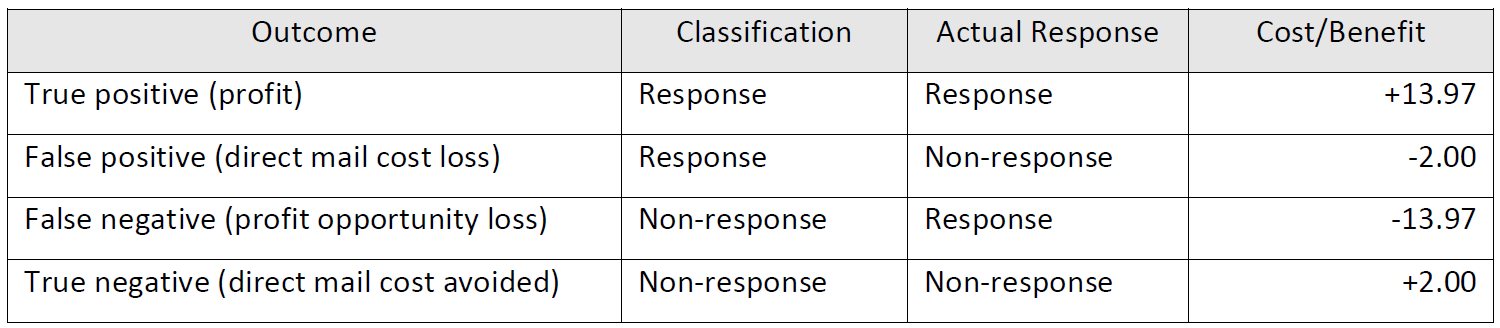

In [419]:
# Defining the calculate_performance function that evaluates the performance of the model. 
# Input is the TPR and TNR which are the recall for the class 1 and class 0 results
def calculate_performance(TPR,TNR,purity):
  score = (13.97*(2*TPR-1) + 2*(2*TNR-1))*purity      # Based on Equation 2. 
  return score

In [420]:
# Defining ratios for subsets of data
ratio_normal = 1            # For normal dataset without any manipulation
ratio_SMOTE = 21740/36258   # For Upsampled Dataset
ratio_under = 1             # For Downsampled Dataset
ratio_balance = 10833/14444 # For Balanced Dataset

# 4.2 Random Forest Model
- For the RandomForest model, Data Set 1 was used where the data was not Scaled or Normalized as this type of model did not classify based on error reduction or distance based method. 
- The score for each Subset of data was compared. In addition the Classification Metrics for each model was also evaluated. 
- The model was run on Normal, Undersample, Upsampled and Balanced Data.  
- Performance was evlauted in order of Score --> Recall (Class 1) --> Accuracy


In [421]:
# Importing the RandomForestClassifier Library
from sklearn.ensemble import RandomForestClassifier

#### Findings:
- The raw data had a huge class imbalance 18129 - Class 0 and 3611 - Class 1. Class 0 counts were 5 times of that of Class 1. 
- This resulted in the model being higly accurate, but with a very poor recall (TPR) for the Responding Customer.
- Taking into account the data presented on the cost - benefit table, this led to a very poor score for the model (-6.3)

Accuracy: 0.8408463661453542

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      5439
           1       0.55      0.21      0.31      1083

    accuracy                           0.84      6522
   macro avg       0.71      0.59      0.61      6522
weighted avg       0.81      0.84      0.81      6522

Model Score:  -6.1974150220094035

Confusion Matrix:


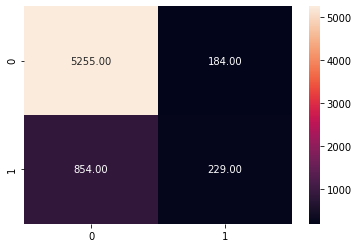

In [422]:
#Random Forest Data Set 1 - Normal Data
ReportForest1, ScoreForest1 = model_run(RandomForestClassifier(),X_train,y_train,X_test,y_test,ratio_normal)

#### Findings: 
- With the upsampled datasets, the data points quantity for each class are equal to one another. 
- Artificial Data points of Class 1 was created with the Artificial Data Points being replicated with close values to the original data points for Class 1 in each feature. 
- Though the ratio / purity of the data reduced, the Recall for Class 1 increased significantly. 
- Accuracy also imporved a lot. 
- Score of the model imporved significantly to 7

Accuracy: 0.8885824600110315

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      5439
           1       0.91      0.86      0.88      5439

    accuracy                           0.89     10878
   macro avg       0.89      0.89      0.89     10878
weighted avg       0.89      0.89      0.89     10878

Model Score:  6.993076038954389

Confusion Matrix:


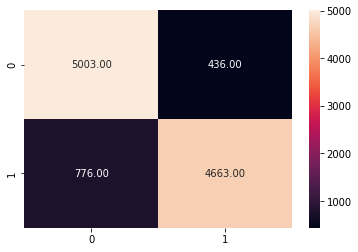

In [423]:
#Random Forest Data Set 1 - Upsampled Data
ReportForest2, ScoreForest2 = model_run(RandomForestClassifier(),X_train_SMOTE,y_train_SMOTE,X_test_SMOTE,y_test_SMOTE,ratio_SMOTE)

#### Findings: 
- With the undersampled data, the data points are also balanced.
- Ratio / purity of the data is maintained as 1 as all of the data points are still the original data points
- Recall and Accuracy for both classes are better than that of the Normal data but not as compared to Upsampled Data
- This is due to the lack of data points for the model to properly learn the dataset. 
- Score is satisfactory at 6.45

Accuracy: 0.7115828334102445

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.72      0.71      1084
           1       0.71      0.70      0.71      1083

    accuracy                           0.71      2167
   macro avg       0.71      0.71      0.71      2167
weighted avg       0.71      0.71      0.71      2167

Model Score:  6.566843740736578

Confusion Matrix:


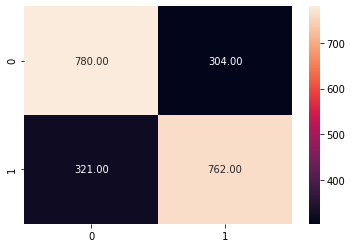

In [424]:
#Random Forest Data Set 1 - UnderSampled Data
ReportForest3,ScoreForest3  = model_run(RandomForestClassifier(),X_train_under,y_train_under,X_test_under,y_test_under, ratio_under)

#### Findings: 
- With the balanced data, the data points are balanced.
- Ratio / purity of the data is reduced and higher than that of the Upsampled data. 
- Recall and Accuracy for both classes are better than that of the Normal and Undersampled data. But not as good as Upsampled data. 
- Score is good at 6.8 which is close to the Upsampled data but not as high. 


Accuracy: 0.8064143977849562

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.84      0.81      2167
           1       0.83      0.77      0.80      2167

    accuracy                           0.81      4334
   macro avg       0.81      0.81      0.81      4334
weighted avg       0.81      0.81      0.81      4334

Model Score:  6.772589986155976

Confusion Matrix:


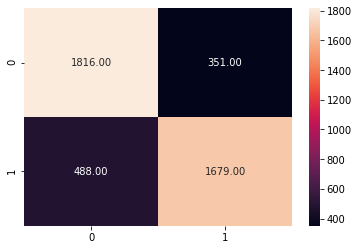

In [425]:
#Random Forest Data Set 1 - Balanced Data
ReportForest4, ScoreForest4 = model_run(RandomForestClassifier(),X_train_Balance,y_train_Balance,X_test_Balance,y_test_Balance, ratio_balance)

#### Run Grid Search CV with Upsampled Data
- The parameters from GridSearchCV managed to improve the score of the model for the Upsampled data but improvment was marginal. 

In [426]:
# # Uncomment to Run (Waiting Time Approx: 1.5 Hours)
# # Running Grid Search With different sets of parameters to see which set of parameters does the model perform best under to improve accuracy
# # Parameter Setting for grid search 
# param_grid = { 
#     'n_estimators': [500,600,700],
#     'max_features': ['auto', 'log2','sqrt'],
#     'criterion' :['gini', 'entropy']
# }

# Forest5 = RandomForestClassifier(random_state=1)
# grid_forest5 = GridSearchCV(estimator= Forest5, param_grid=param_grid,cv = 10,verbose = 2)      # Perform 10 Cross Validations for each parameter set
# grid_forest5.fit(X_train_SMOTE, y_train_SMOTE)                                                  # Run GridSeachCV with UpSampled data as it provided the best score with the basic data
# grid_forest5.best_params_                                                                       # Display the best set of parameters. 

# # Results Obtained from Grid Search:
# # {'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 700}

Accuracy: 0.8920757492186063

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      5439
           1       0.92      0.86      0.89      5439

    accuracy                           0.89     10878
   macro avg       0.89      0.89      0.89     10878
weighted avg       0.89      0.89      0.89     10878

Model Score:  7.025667199821475

Confusion Matrix:


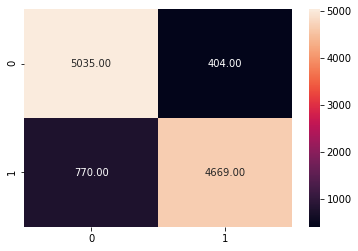

In [427]:
# Random Forest Data Set 1 - Upsampled Data
# Parameters used are those obtained from the GridSearchCV
# The parameters from GridSearchCV managed to improve the score but marginal. 
ReportForest6,ScoreForest6 = model_run(RandomForestClassifier(criterion = "entropy",max_features = "auto",n_estimators = 700),X_train_SMOTE,y_train_SMOTE,X_test_SMOTE,y_test_SMOTE,ratio_SMOTE)

#### Overall Summary:
- Results obtained are good. 
- Best Model for Random Forest is Upsampled followed by Balanced Data
- Further evalutaion in other Models will be done with these 2 data
- Normal data's performance is poorest (Highly imbalanced) and the 2nd worst is undersampled data (too little data although balanced). 
- Model tuning using GridSearchCV improved the Model's performance of the Upsampled data but the improvement was marginal. 

#4.3  Support Vector Machine Model (SVM)
- For SVM, Data Set 2 and 3 were used as this type of model is a distance based model and is highly affected by the range of values in the data. 
- Training and evaluation was done in the same manner with Section 4.2
- The model was run on only Upsampled and Balanced Data.
- Performance was evlauted in order of Score --> Recall (Class 1) --> Accuracy

In [428]:
# Importing Required Library
from sklearn.svm import SVC

#### Findings:
- With SVM Model, score produced for the upscaled data is much lower than that compared to the RandomForest Model
- The recall and accuracy rate is lower for Class 1. 
- Between scaled and normalized data, it was observed that the Scaled data performed much better and this is similar for both upsampled and balanced datasets. 
- The Upsampled dataset produced the best Score and Recall rate which validates the results obtained form the Random Forest Model. 

Accuracy: 0.7264202978488693

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.75      0.73      5439
           1       0.74      0.71      0.72      5439

    accuracy                           0.73     10878
   macro avg       0.73      0.73      0.73     10878
weighted avg       0.73      0.73      0.73     10878

Model Score:  4.053779734541419

Confusion Matrix:


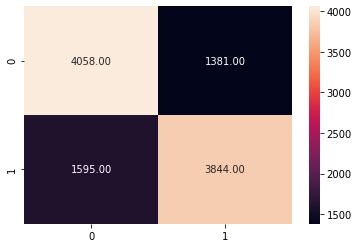

In [429]:
# SVM Data Set 2 & 3 - Upsampled Data
ReportSVC1, ScoreSVC1 = model_run(SVC(),X_trainScale_SMOTE,y_trainScale_SMOTE,X_testScale_SMOTE,y_testScale_SMOTE, ratio_SMOTE)
# Results:
# ScoreScale = 4.042334685423501
# ScoreNorm  = 3.703518458666091

Accuracy: 0.687586525149977

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.76      0.71      2167
           1       0.72      0.61      0.66      2167

    accuracy                           0.69      4334
   macro avg       0.69      0.69      0.69      4334
weighted avg       0.69      0.69      0.69      4334

Model Score:  3.1679314720812193

Confusion Matrix:


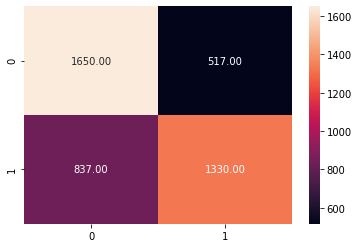

In [430]:
# SVM Data Set 2 & 3 - Balance Data
ReportSVC2, ScoreSVC2 = model_run(SVC(),X_trainScale_Balance,y_trainScale_Balance,X_testScale_Balance,y_testScale_Balance, ratio_balance)
# Results:
# ScoreScale = 3.272709967697278
# ScoreNorm  = 3.2480814490078442

#### Overall Summary:
- Results obtained are moderate. 
- Results obtained using SVM was much poorer as compared to that of Random Forest
- Best Model is Upsampled followed by Balanced Data
- The model performed better with Scaled data as compared to Normalized data
- Model tuning using GridSearchCV was not carried out as the performance was significantly poor as compared to that of Random Forest and hence, tuning will not help in singnificantly improving the Model's performance. 
- Albeit, it validates the pattern of results observed in Random Forest where the Upsampled data performed the best. 

# 4.4 K-Nearest Neighbors (KNN) Model
- For KNN, Data Set 1, 2 and 3 were used.
- Training and evaluation was done in the same manner with Section 4.2 & 4.3
- The model was run on only Upsampled & Balanced Data. 
- Performance was evaluated in order of Score --> Recall (Class 1) --> Accuracy

In [431]:
# Importing required library
from sklearn.neighbors import KNeighborsClassifier

#### Findings:
- With KNN Model, score produced for the upscaled data is much higher than that compared to the RandomForest Model
- The recall is higher for Class 1 but the accuracy rate is lower than that of Random Forest. 
- For both Model KNN1 and KNN2, it is observed that both performed best on Scaled Data. 
- The Upsampled dataset produced the best Score and Recall rate which is better in KNN1 as compared to Random Forest Model. 
- In KNN2 however, it was observed that the Score is lower as compared to that in the Random Forest. This is because  the Recall rate for Class 1 is lower for KNN2. 

Accuracy: 0.8116381687810259

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.68      0.78      5439
           1       0.75      0.94      0.83      5439

    accuracy                           0.81     10878
   macro avg       0.83      0.81      0.81     10878
weighted avg       0.83      0.81      0.81     10878

Model Score:  7.811603198466393

Confusion Matrix:


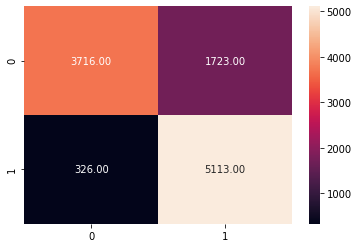

In [432]:
# KNN Data Set 1,2 & 3 - Upsampled Data
ReportKNN1,ScoreKNN1 = model_run(KNeighborsClassifier(),X_trainScale_SMOTE,y_trainScale_SMOTE,X_testScale_SMOTE,y_testScale_SMOTE, ratio_SMOTE) 
# Results:
# ScoreNormal = 7.08299827518522
# ScoreScale  = 7.794392631443766
# ScoreNorm   = 7.534435019943637

Accuracy: 0.7247346562067374

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.69      0.71      2167
           1       0.71      0.76      0.73      2167

    accuracy                           0.72      4334
   macro avg       0.73      0.72      0.72      4334
weighted avg       0.73      0.72      0.72      4334

Model Score:  6.025656437471159

Confusion Matrix:


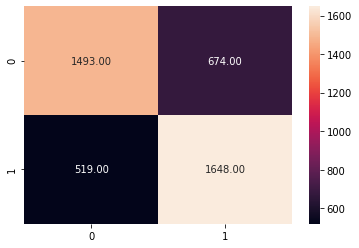

In [433]:
# KNN Data Set 1,2 & 3 - Balanced Data
ReportKNN2,ScoreKNN2 = model_run(KNeighborsClassifier(),X_trainScale_Balance,y_trainScale_Balance,X_testScale_Balance,y_testScale_Balance, ratio_balance) 
# Results:
# ScoreNormal = 5.9937321181356715
# ScoreScale  = 6.04338371019843
# ScoreNorm   = 5.743840562990308

In [434]:
# # Uncomment to Run (Waiting time approx: 15 mins)
# # Running Grid Search 
# # Parameter Setting for grid search 
# param_grid = { 
#     'n_neighbors': list(range(5, 21)),
#     'weights': ['uniform', 'distance'],
#     'algorithm' :['auto', 'ball_tree','kd_tree','brute']
# }

# KNN3 = KNeighborsClassifier()
# grid_KNN3 = GridSearchCV(estimator = KNN4, param_grid=param_grid,cv = 10,verbose = 2)
# grid_KNN3.fit(X_trainScale_SMOTE,y_trainScale_SMOTE)
# grid_KNN3.best_params_

# # Results:
# # SMOTE: {'algorithm': 'auto', 'n_neighbors': 6, 'weights': 'distance'}

Accuracy: 0.8325059753631182

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.70      0.81      5439
           1       0.76      0.96      0.85      5439

    accuracy                           0.83     10878
   macro avg       0.86      0.83      0.83     10878
weighted avg       0.86      0.83      0.83     10878

Model Score:  8.23103525568952

Confusion Matrix:


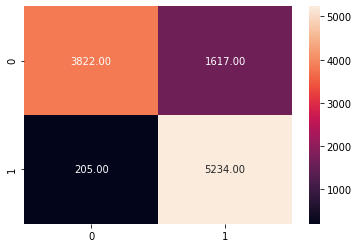

In [435]:
# Data Set 2 - Upsampled data
# Parameters tuned as per GridSearchCV
# Results showed significant improvements in the score as recall rate improved for both Classes. 
# Accuracy also improved with tuned paraameters. 
ReportKNN5, ScoreKNN5 = model_run(KNeighborsClassifier(algorithm = "auto",n_neighbors = 6,weights = "distance"),X_trainScale_SMOTE,y_trainScale_SMOTE,X_testScale_SMOTE,y_testScale_SMOTE,ratio_SMOTE) 

#### Overall Summary:
- Results obtained are good. 
- Results obtained using KNN was better than that achieved with Random Forest Model for the Upsampled Data Set.
- Best Model is Upsampled followed by Balanced Data
- The model performed better with Scaled data as compared to the rest. 
- Model tuning using GridSearchCV improved the score of the Scaled Upsampled Data Model from 7.8 to 8.2. 
- The best model performed better than Random Forest and shares the same trend of results. 
- Score for KNN model is higher, Recall rate for Class 1 is higher but Recall rate for Class 0 is lower than that of Random Forest Model which leads to overall lower accuracy. 
- Nonetheless, given that the weight of the Recall Rate of Class 1 is much important, the lower accuracy is justified. 

# 4.5 Keras Sequential Neural Network Classifier Model
- For Keras Sequential Neural Network Model, Data Set 3 was used as Neural Network Model need Normalized data for computation. 
- Training and evaluation was done in the same manner with Section 4.2 & 4.3 & 4.4
- The model was run on only Upsampled Data. 
- Performance was evlauted in order of Score --> Recall (Class 1) --> Accuracy

In [436]:
# Importing required Libraries to Build the Neural Network Model. 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
import tensorflow as tf

In [437]:
# Function to One Hot Encode the Target Variable
def hot_encode(X_train,y_train,X_test,y_test):
  from tensorflow.keras.utils import to_categorical   # Use the to_categorical library from tensorflow.keras.utils
  y_train_seq = to_categorical(y_train,2)             # One Hot Encode for Training
  y_test_seq = to_categorical(y_test,2)               # One Hot Encode for Testing
  return (X_train,y_train_seq,X_test,y_test_seq)      # Return the training data

# Function to process the output predicted results from the Sequential Model. 
# As the predicted result output from the Sequential model is a 2-D array of probability for each Class, the function will round off the probability values for Class 1 Column.
# The processed data is then used to build the classification report and confusion matrix
def sequent(y_predict,y_test,ratio):      # Takes in the testing data target variable and the predicted target variables / output.
  y_copy = y_predict.copy()               # Creates a copy of the predicted output
  for i in range(len(y_predict)):         # Converts the probability of both Classes of the One Hot Encoded Results such that:
    for j in range(2):                    # Should Predicted_Output_Class(P < 0.5) = 0 & Predicted_Output_Class(P >= 0.5) = 1
      if y_copy[i,j]<0.5:
        y_copy[i,j] = 0
      else:
        y_copy[i,j] = 1
  y_copy = y_copy[:,1]                    # Taking only the Column for Class 1
  print("Accuracy:",metrics.accuracy_score(y_test,y_copy))          # Print Accuracy of Model
  report = classification_report(y_test,y_copy,output_dict=True )   # Store classification report in report variable in dictionary format
  print(classification_report(y_test,y_copy))                       # Print Classification Report
  
  score = calculate_performance(report["1"]["recall"],report["0"]["recall"],ratio)    # Calculate the score for model performance evaluation. Refer Explanation on calculate_performance function. 
  print("Model Score: ",score)                                      # Print Score
  
  # Plot the heatmap of the confusion matrix
  print("\nConfusion Matrix:")
  plt.figure()
  sns.heatmap(confusion_matrix(y_test,y_copy),annot = True,fmt = '.2f') 

  return report, score                   # Returns the report and score variables

#### Findings:
- With Keras Sequential Neural Network Model, the score produced for the upscaled data is satisfactory but not comparable to that of the Random Forest and KNN models.
- The recall rate for Class 1 is satisfactory at about 73% on average. However, the overall score of the model is brought down by its purity of data / ratio.

Epoch 1/30

Epoch 00001: LearningRateScheduler reducing learning rate to 0.009999999776482582.
2538/2538 [==============================] - 5s 2ms/step - loss: 0.6328 - accuracy: 0.6508 - val_loss: 0.5801 - val_accuracy: 0.6965
Epoch 2/30

Epoch 00002: LearningRateScheduler reducing learning rate to 0.009999999776482582.
2538/2538 [==============================] - 4s 2ms/step - loss: 0.5765 - accuracy: 0.7029 - val_loss: 0.5724 - val_accuracy: 0.7008
Epoch 3/30

Epoch 00003: LearningRateScheduler reducing learning rate to 0.009999999776482582.
2538/2538 [==============================] - 4s 2ms/step - loss: 0.5722 - accuracy: 0.7076 - val_loss: 0.5679 - val_accuracy: 0.7070
Epoch 4/30

Epoch 00004: LearningRateScheduler reducing learning rate to 0.009999999776482582.
2538/2538 [==============================] - 4s 2ms/step - loss: 0.5665 - accuracy: 0.7086 - val_loss: 0.5666 - val_accuracy: 0.7070
Epoch 5/30

Epoch 00005: LearningRateScheduler reducing learning rate to 0.0099999997764

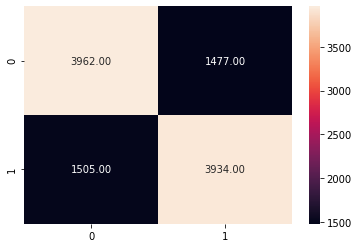

In [438]:
#Prepare data
(X_trainSeq,y_trainSeq,X_testSeq,y_testSeq) = hot_encode(X_trainNorm_SMOTE,y_trainNorm_SMOTE,X_testNorm_SMOTE,y_testNorm_SMOTE)

#Build and run Model
model1 = Sequential()
model1.add(Dense(39, activation='relu', input_shape=(13,)))
model1.add(Dense(26, activation='relu'))
model1.add(Dense(13, activation='relu'))
model1.add(Dense(2, activation='sigmoid'))
model1.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

#Defining the learning rate scheduler to control the learning rate of the model
def scheduler(epoch, lr):     #input of epoch and learning rate (LR)
  if epoch < 20:              #from epoch 1 to the 10th epoch, the learning rate is set at 0.01 as default for sgd
    return lr
  else:                       #After the 10th Epoch the learning rate is halved with each epoch. 
    return lr/2   

callback = tf.keras.callbacks.LearningRateScheduler(scheduler,verbose = 1)         #Callback parameter that calls the function "scheduler" to automatically adjust the models learning rate after each epoch. 

history1 = model1.fit(X_trainSeq, y_trainSeq, batch_size=10,epochs=30,validation_data =(X_testSeq,y_testSeq),callbacks = [callback] ,verbose=1)
y_predictor1 = model1.predict(X_testSeq)

#Classification Report
ReportSeq1, ScoreSeq1 = sequent(y_predictor1,y_testNorm_SMOTE,ratio_SMOTE)

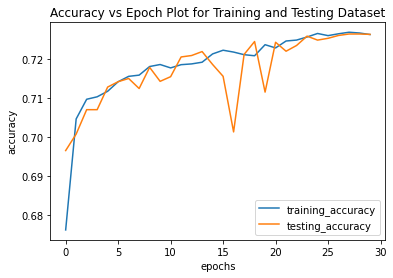

In [439]:
import matplotlib.pyplot as plt
plt.plot(history1.history['accuracy'],label = 'training_accuracy')
plt.plot(history1.history['val_accuracy'],label = 'testing_accuracy')
plt.title("Accuracy vs Epoch Plot for Training and Testing Dataset")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()

#### Overall Summary:
- Results obtained are moderate. 
- Results obtained using Keras Sequential Neural Network Model was much poorer as compared to that of Random Forest and KNN
- Further improvement can be made by tuning the model parameters. 

# 5. Conclusion
- The raw data was analysed and feature engineering was carried out to select suitable sets of features for training different sets of Machine Learning Models. Based on Analysis 13 features were selected comprising of individual features as well as combined-closely-related features via LDA method. 
- An evaluation score metric was created based on the Problem statement given to properly compare the Models' performance. This metric score took into account the weights given for the different classification rates. It also took into account the purity of the dataset (concentration of raw data as opposed to artificial data) to level the score achieved by the Models. 
- There is a significant amount of class imbalance between Class 0 and 1. To handle the imbalance of class, 3 methods were proposed which were undersampling, upsampling and balanced sampling. For all models, the upsampled data provided the best results / score. 
- Models of Random Forest (Tree Based), SVM (Distance Based), KNN (Distance Based) and Keras Sequential Neural Network Model (Error reduction based) were built, trained and tested on the different datasets. These models were developed and tuned accordingly to improve the results obtained. 
- Results showed that the Tuned KNN model (KNN5) with the upsampled data performed the best with an overall score of 8.24 followed by the Tuned Random Forest Model (RandomForest6) with a score of 7.13.

#### Suggested Improvements:
- Improving on feature engineering section to better analyse and select the features.
- To obtain more samples of Class 1 if possible.
- To study the reliability of Upsampling as opposed to using Balanced Sampling. 

In [440]:
print("-------------------------------------------------------------------------------------------------------------------------------------THE END THANK YOU----------------------------------------------------------------------------------------------------------------------------------------")

-------------------------------------------------------------------------------------------------------------------------------------THE END THANK YOU----------------------------------------------------------------------------------------------------------------------------------------
